In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
y = diabetes.target

In [5]:
from sklearn.linear_model import Ridge

alpha = np.logspace(-3,1,5)

data = []

for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a)
    ridge.fit(x,y)
    data.append(pd.Series(np.hstack([ridge.coef_])))
    
df_ridge = pd.DataFrame(data,index=alpha)
df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


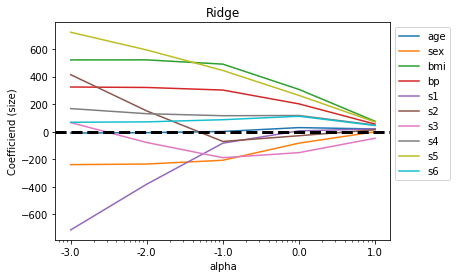

In [6]:
#alpha값이 증가하면서 회귀계수값이 0에 수렴하는지 시각화
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)
plt.xticks(alpha,labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns,bbox_to_anchor=(1,1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficiend (size)')
plt.axhline(y=0,linestyle='--',color='black',linewidth=3)

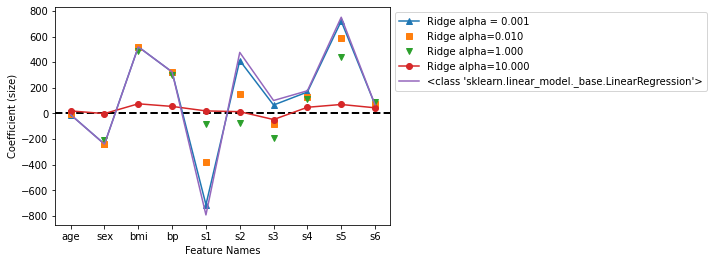

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x,y)

plt.axhline(y=0,linestyle='--',color='black',linewidth=2)
plt.plot(df_ridge.loc[0.001],'^-',label = 'Ridge alpha = 0.001')
plt.plot(df_ridge.loc[0.010],'s',label='Ridge alpha=0.010')
plt.plot(df_ridge.loc[0.100],'v',label='Ridge alpha=1.000')
plt.plot(df_ridge.loc[10.000],'o-',label='Ridge alpha=10.000')

plt.plot(lr.coef_,label=LinearRegression)
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))

In [11]:
#라쏘
from sklearn.linear_model import Lasso

alpha=np.logspace(-3,1,5)
data = []
for i,a in enumerate(alpha):
    lasso = Lasso(alpha=a)
    lasso.fit(x,y)
    data.append(pd.Series(np.hstack(lasso.coef_)))
    
df_lasso = pd.DataFrame(data,index=alpha)
df_lasso.columns=x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


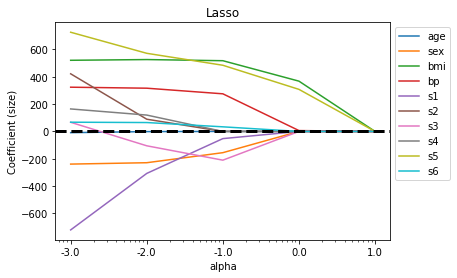

In [12]:
plt.semilogx(df_lasso)
plt.xticks(alpha,labels=np.log10(alpha))
plt.legend(labels=df_lasso.columns,bbox_to_anchor=(1,1))

plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0,linestyle='--',color='black',linewidth=3)

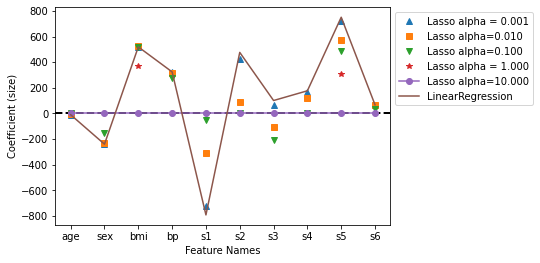

In [17]:
#MSE를 사용한 회귀모델과 비교
plt.axhline(y=0,linestyle='--',color='black',linewidth=2)
plt.plot(df_lasso.loc[0.001],'^',label = 'Lasso alpha = 0.001')
plt.plot(df_lasso.loc[0.010],'s',label='Lasso alpha=0.010')
plt.plot(df_lasso.loc[0.100],'v',label='Lasso alpha=0.100')
plt.plot(df_lasso.loc[1.000],'*',label='Lasso alpha = 1.000')
plt.plot(df_lasso.loc[10.000],'o-',label='Lasso alpha=10.000')

plt.plot(lr.coef_,label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))

In [18]:
#엘라스틱넷
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3,1,5)
data = []

for i, a in enumerate(alpha):
    ela = ElasticNet(alpha=a,l1_ratio = 0.5)
    ela.fit(x,y)
    data.append(pd.Series(np.hstack([ela.coef_])))
    
df_ela = pd.DataFrame(data,index=alpha)
df_ela.columns = x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


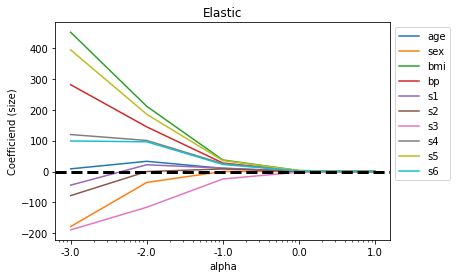

In [20]:
plt.semilogx(df_ela)
plt.xticks(alpha,labels=np.log10(alpha))
plt.legend(labels=df_ela.columns,bbox_to_anchor=(1,1))

plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficiend (size)')
plt.axhline(y=0,linestyle='--',color='black',linewidth=3)

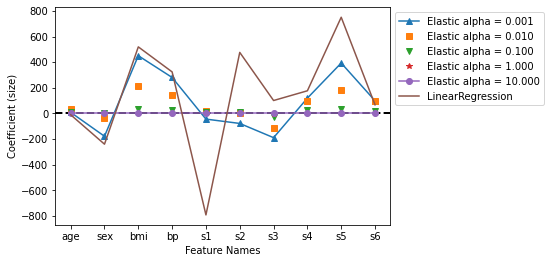

In [21]:
plt.axhline(y=0,linestyle='--',color='black',linewidth=2)

plt.plot(df_ela.loc[0.001],'^-',label='Elastic alpha = 0.001')
plt.plot(df_ela.loc[0.010],'s',label='Elastic alpha = 0.010')
plt.plot(df_ela.loc[0.100],'v',label='Elastic alpha = 0.100')
plt.plot(df_ela.loc[1.000],'*',label='Elastic alpha = 1.000')
plt.plot(df_ela.loc[10.000],'o-',label='Elastic alpha = 10.000')

plt.plot(lr.coef_,label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))